<h1>QUESTIONPAPER

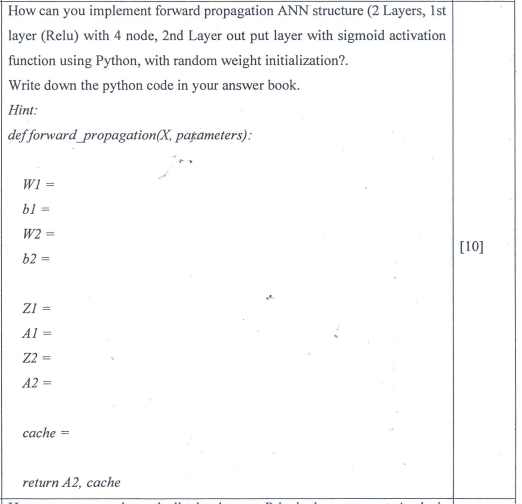

In [1]:
import numpy as np

def sigmoid(z):
    return 1/(1+np.exp(-z))

def relu(z):
    return np.maximum(0,z)

#layer_size is not important for this question


In [5]:
def init_par(n_x,n_h,n_y):
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))

    parameters={"W1":W1,'b1':b1,'W2':W2,'b2':b2}
    return parameters


In [12]:
def forward_prop(X,parameters):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']

    Z1=np.dot(W1,X)+b1
    A1=relu(Z1)

    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)

    cache={'Z1':Z1,'A1':A1,'Z2':Z2,'A2':A2}
    return A2, cache

parameters = init_par(n_x=2, n_h=4, n_y=1)
A2, cache = forward_prop(X, parameters)

print("Output A2:\n", A2)
print("Cache:\n", cache)

Output A2:
 [[0.5        0.49998172 0.50009291]]
Cache:
 {'Z1': array([[-0.00697792,  0.00079774,  0.01278459],
       [-0.00209327, -0.00311065,  0.02308219],
       [-0.01076747,  0.00399679,  0.00383681],
       [-0.02066419,  0.00886387,  0.00050615]]), 'A1': array([[0.        , 0.00079774, 0.01278459],
       [0.        , 0.        , 0.02308219],
       [0.        , 0.00399679, 0.00383681],
       [0.        , 0.00886387, 0.00050615]]), 'Z2': array([[ 0.00000000e+00, -7.31045672e-05,  3.71625866e-04]]), 'A2': array([[0.5       , 0.49998172, 0.50009291]])}


<h1>Backward propagation

In [29]:
import numpy as np
def sigmoid(z):
    return 1/(1+np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def init_para(n_x,x_h,x_y):
    W1=np.random.randn(x_h,n_x)*0.01
    b1=np.zeros((x_h,1))
    W2=np.random.randn(x_y,x_h)*0.01
    b2=np.zeros((x_y,1))

    return {"W1":W1,"b1":b1,"W2":W2,"b2":b2}



def FWDP(X,parameters):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']

    Z1=np.dot(W1,X)+b1
    A1=relu(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)

    cache={'Z1':Z1,'A1':A1,'Z2':Z2,'A2':A2}
    return A2,cache

    #in backwad prop no cost function in forward

def BWDP(parameters,cache,X,Y):
    W1=parameters['W1']
    W2=parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']


    m=X.shape[1]
    
    #output layers
    dZ2=A2-Y
    dW2=np.dot(dZ2,A1.T)/m
    db2=np.sum(dZ2,axis=1,keepdims=True)/m

    #hidden layer
    dA1=np.dot(W2.T,dZ2)
    dZ1=dA1*(A1>0)
    dW1=np.dot(dZ1,X.T)/m
    db1=np.sum(dZ1,axis=1,keepdims=True)/m
    grades={"dW1":dW1,"db1":db1,"dW2":dW2,"db2":db2}
    return grades
    

In [30]:
np.random.seed(1)
X = np.random.randn(2,3)
Y = (np.random.randn(1,3) > 0)

parameters = init_para(2,4,1)
A2, cache = FWDP(X, parameters)
grads = BWDP(parameters, cache, X, Y)

print("A2 =\n", A2)
print("\nGradients =\n", grads)


A2 =
 [[0.5        0.49997323 0.49997503]]

Gradients =
 {'dW1': array([[ 8.95011273e-04, -1.26610783e-03],
       [-5.87654243e-06,  2.22819278e-04],
       [-5.94203092e-04,  8.40576213e-04],
       [ 1.53216329e-04, -5.80946230e-03]]), 'db1': array([[-1.46301903e-03],
       [-7.28094152e-09],
       [ 9.71306682e-04],
       [ 1.89832566e-07]]), 'dW2': array([[ 0.002363  , -0.00141504,  0.00202676, -0.00075702]]), 'db2': array([[-0.16668391]])}


In [25]:
print("Actual Y:\n", Y)
print("Predicted A2:\n", A2)
print("Difference A2 - Y:\n", A2 - Y)


Actual Y:
 [[ True False  True]]
Predicted A2:
 [[0.5        0.49997323 0.49997503]]
Difference A2 - Y:
 [[-0.5         0.49997323 -0.50002497]]


In [28]:
# print("\ndW2:\n", grads["dW2"])
# print("\ndb2:\n", grads["db2"])
# print("\ndW1:\n", grads["dW1"])
# print("\ndb1:\n", grads["db1"])